## Project Challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Report_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data analysis and visualisation</u>](#datavis)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Prediction challenge</u>](#prediction)
    - [3.1: <u>The expected revenue (gross)</u>](#gross)
    - [3.2: <u>IMDb score (score)</u>](#score) 
- [Part 4: <u>Exploratory component</u>](#explore)
    - [4.1: <u>Q1</u>](#q1)
    - [4.2: <u>Q2</u>](#q2)
- [Part 5: <u>Conclusion</u>](#conc)

In [80]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

%matplotlib inline

---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

We will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data). The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. Below is the features list that are included in the dataset.

**Features**

* **titleId**: IMDb's relational database ID for "title".
* **title**: Title of the movie.
* **rating**: MPAA (Motion Picture Association of America film rating system ) rating. 
* **region**: Region. 
* **genre**: The movie genre.
* **released**: Release date of the movie in theaters.
* **year**: Year of movie release.
* **month**: Month of movie release.
* **day**: Day of movie release.
* **score**: IMDb score.
* **director**: Director of the movie.
* **writer**: Writer of the movie.
* **star**: Main actor and actress of the movie.
* **country**: Main country of the movie.
* **budget**: Budget of the movie.
* **gross**: Gross revenue (box office) of the movie.
* **company**: Production company of the movie.
* **runtime**: Runtime of the movie in minutes. 
* **category**: Type of the credit this person ("primaryName") had for working on the movie. 
* **nconst**: IMDb's relational database ID for "primaryName".
* **primaryName**: Name of person who worked on the movie.
* **knownForTitles**: Top 4 titles an actor (indicated by "primaryName") is known for, by titleID. 

---
<a id='datavis'></a>
## Part 2: _<u>Data analysis and visualisation</u>_

---
<a id='prediction'></a>
## Part 3: _<u>Prediction challenge</u>_

<a id='gross'></a>
### 3.1: _<u>The expected revenue (gross)</u>_

<a id='score'></a>
### 3.2: _<u>IMDb score (score)</u>_

In [59]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


In [60]:
#df_movies.to_csv('df_movies.csv', index = False)

In [392]:
train = pd.read_csv('df_movies.csv') #Pandas' deep copy does not work so the orgianl will still be changed
low =np.percentile(train['score'], 25)
high = np.percentile(train['score'], 75)
train.loc[train['score'] <= low,'score'] = 1 
train.loc[(train['score'] > low) & (train['score'] < high),'score']  = 2
train.loc[train['score'] >= high, 'score']  = 3
train['score'] = train['score'].astype(int)

In [393]:
# Finding and binarize the features with the top 30 most commen 
train = binary_features(train, ['director','writer','star','country','company', 'duration', 'rating','genre','year'], 30)


In [394]:
from sklearn.utils import shuffle

X = shuffle(train) #,random_state=0


In [395]:
## define features to use 
target = X['score']
movie_title_temp = X['title_year']
features = X[X.columns[~X.columns.isin(['title_year','titleId','title','primaryName','category','region',
'released','released_2','day','score','nconst','knownForTitles','month','continent'])]]

x_train, x_test, y_train, y_test, movie_title_train, movie_title_test = train_test_split(features, target, movie_title_temp, test_size=0.25)


In [396]:

## some features have very different ranges e.g. absecences, age ect. 
## therefore it is important to standardize the feature set. 


x_mean = x_train.iloc[:,0:4].mean()
x_std = x_train.iloc[:,0:4].std()

x_train.iloc[:,0:4] = (x_train.iloc[:,0:4] - x_mean) / x_std
x_test.iloc[:,0:4] = (x_test.iloc[:,0:4] - x_mean) / x_std

#### Looking at different models

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
ypred_svc = svc.predict(x_test)
svc_f1 = f1_score(y_test, ypred_svc, average='weighted')
print(confusion_matrix(y_test, ypred_svc))

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
ypred_per = perceptron.predict(x_test)
per_f1 = f1_score(y_test, ypred_per, average='weighted')
print(confusion_matrix(y_test, ypred_per))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
ypred_rf = random_forest.predict(x_test)
rf_f1 = f1_score(y_test, ypred_rf, average='weighted')
print(confusion_matrix(y_test, ypred_rf))

# Decision Tree
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
ypred_DT = DT.predict(x_test)
DT_f1 = f1_score(y_test, ypred_DT, average='weighted')
print(confusion_matrix(y_test, ypred_DT))

# K Nearest Neighbor
knearest = KNeighborsClassifier(n_neighbors=2)
knearest.fit(x_train, y_train)
ypred_KNN = knearest.predict(x_test)
KNN_f1 = f1_score(y_test, ypred_KNN, average='weighted')
print(confusion_matrix(y_test, ypred_KNN))

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
ypred_g = gaussian.predict(x_test)
g_f1 = f1_score(y_test, ypred_g, average='weighted')
print(confusion_matrix(y_test, ypred_g))

# Logistic Regression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)
ypred_LogReg = LogReg.predict(x_test)
LogReg_f1 = f1_score(y_test, ypred_LogReg, average='weighted')
print(confusion_matrix(y_test, ypred_LogReg))

# Reflection on the models' f1-score
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
    'f1_score': [svc_f1, KNN_f1, LogReg_f1, 
              rf_f1, g_f1, per_f1, DT_f1]})
models.sort_values(by='f1_score', ascending=False).T


[[135 198  11]
 [ 81 474  74]
 [  5 190 158]]
[[209 101  34]
 [240 239 150]
 [ 43 115 195]]
[[163 164  17]
 [120 414  95]
 [ 14 148 191]]
[[153 142  49]
 [178 317 134]
 [ 35 141 177]]
[[214 119  11]
 [305 273  51]
 [104 168  81]]
[[330   7   7]
 [553  49  27]
 [262  39  52]]
[[146 181  17]
 [ 95 434 100]
 [ 12 162 179]]


,3,0,2,6,5,1,4
Model,Random Forest,Support Vector Machines,Logistic Regression,Decision Tree,Perceptron,KNN,Naive Bayes
f1_score,0.576827,0.566726,0.566585,0.488689,0.480722,0.419603,0.242267


In [ ]:
# Model reflection
print('Classification accuracy: %.2f'% accuracy_score(y_test, ypred_per))
print('F1 score: %.2f' % f1_score(y_test, ypred_per))
temp = np.array([['TP', 'FN'],['FP','TN']],dtype=str)
print(f'Confusion matrix (Decision Tree Classifier):\n{confusion_matrix(y_test,ypred_per, labels=[1,0])}\n{temp}')
ncm = confusion_matrix(y_test, ypred_per, normalize='true',  labels=[1,0])
print('Normalized Confusion matrix (Decision Tree Classifier): \n', ncm)
print(f'The sensitivity is {round(ncm[0][0],3)} and specificity is {round(ncm[1][1],3)} for our classifier.')

# run for 100 turns to find the average sensitivity and specificity
import statistics
sens = []
speci = []
n = 100
for i in range(n):
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.15)
    scaler = StandardScaler()  
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train) 
    x_test = scaler.transform(x_test)
    perceptron.fit(x_train, y_train)
    ypred = perceptron.predict(x_test)
    sens.append(confusion_matrix(y_test, ypred, normalize='true',  labels=[1,0])[0][0])
    speci.append(confusion_matrix(y_test, ypred, normalize='true',  labels=[1,0])[1][1])
print(f"The average sensitivity for is {round(statistics.mean(sens),3)} and average specificity is {round(statistics.mean(speci),3)} for {n} runs.")

#### Model 1

In [235]:
from sklearn import linear_model as lm, metrics, tree, ensemble, model_selection as ms, feature_selection, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [239]:
#def evaluation(x_train, y_train, x_test, y_test, model):

def my_plot(regr, x, y, xlab="x", ylab="y", size=0.1):

    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean absolute error    
    print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))

    y_pred = regr.predict(x)

            
    # Plot outputs
    plt.scatter(y_pred, y, alpha=.5)
    plt.plot(np.linspace(0,10), np.linspace(0,10))
    plt.title('Final Model Prediction vs. Target',fontdict = {'fontsize' : 20})
    plt.xlabel('Predicted IMDb Rating',fontdict = {'fontsize' : 16})
    plt.ylabel('Actual IMDb Rating',fontdict = {'fontsize' : 16})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axis([1,10,1,10])
    plt.show()

    # R2 score
    print('R^{2} score: %.2f' % r2_score(y, y_pred))

    plt.hist(y_pred)
    plt.show()
    print(max(y_pred))

    plt.show()

Mean Absolute error (MAE): 0.83
Root Mean squared error: 1.10
Variance score: -0.33


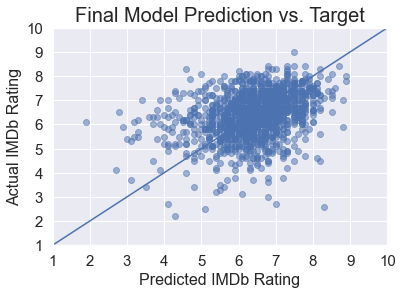

R^{2} score: -0.33


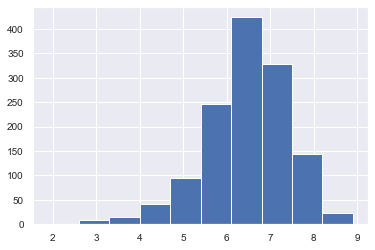

8.9


In [240]:
regr=tree.DecisionTreeRegressor()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
my_plot(regr, x_test, y_test)

In [217]:
X = shuffle(train) #,random_state=0
x_train, x_test, y_train, y_test, movie_title_train, movie_title_test = train_test_split(features, target, movie_title_temp, test_size=0.25)

## some features have very different ranges e.g. absecences, age ect. 
## therefore it is important to standardize the feature set. 

x_mean = x_train.iloc[:,0:4].mean()
x_std = x_train.iloc[:,0:4].std()

x_train.iloc[:,0:4] = (x_train.iloc[:,0:4] - x_mean) / x_std
x_test.iloc[:,0:4] = (x_test.iloc[:,0:4] - x_mean) / x_std

regr=lm.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [218]:
out = [x for x in y_pred if x >10]
len([x for x in y_pred if x >10]), out

(1, [10.477949084312952])

In [219]:
movie_title_test.reset_index(drop=True, inplace=True)
for i in out:
    index_out = list(y_pred).index(i)
    print(movie_title_test[index_out])

Avatar_2009


In [104]:
# Function to return simple model metrics
def get_model_metrics(X_train, y_train, X_test, y_test, model, parametric=True):
    """This function takes the train-test splits as arguments, as well as the algorithm 
    being used, and returns the training score, the test score (both RMSE), the 
    cross-validated scores and the mean cross-validated score. It also returns the appropriate 
    feature importances depending on whether the optional argument 'parametric' is equal to 
    True or False."""
    
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    print(train_pred)
    test_pred = model.predict(X_test)
    print(test_pred)
    
    print('Training score', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, train_pred))))
    print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, test_pred))))
    cv_scores = -ms.cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('Cross-validated RMSEs:', np.sqrt(cv_scores))
    print('Mean cross-validated RMSE:', '{0:0.2f}'.format(np.sqrt(np.mean(cv_scores))))
    
    plt.scatter(test_pred, y_test, alpha=.5)
    plt.plot(np.linspace(0,20), np.linspace(0,20))
    plt.title('Final Model Prediction vs. Target',fontdict = {'fontsize' : 20})
    plt.xlabel('Predicted IMDb Rating',fontdict = {'fontsize' : 16})
    plt.ylabel('Actual IMDb Rating',fontdict = {'fontsize' : 16})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axis([1,10,1,10])
    plt.show()
    
    if parametric == True:
        print(pd.DataFrame(list(zip(X_train.columns, model.coef_, abs(model.coef_))), 
                 columns=['Feature', 'Coef', 'Abs Coef']).sort_values('Abs Coef', ascending=False).head(10))
    else:
        print(pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), 
                 columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))
    
    return model

Training score 0.75
Testing RMSE: 12751402802.94
Cross-validated RMSEs: [1.07095426e+10 1.54333218e+09 6.05634808e+09 1.12809042e+09
 1.08522220e+10]
Mean cross-validated RMSE: 7386458395.49


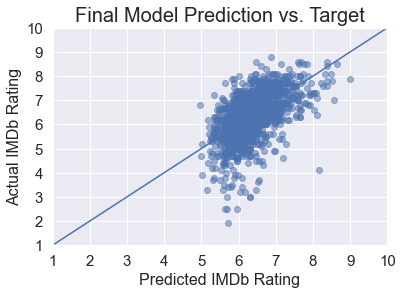

                     Feature          Coef      Abs Coef
1                      gross  7.072994e+12  7.072994e+12
3                     Profit -5.980275e+12  5.980275e+12
0                     budget -1.583776e+12  1.583776e+12
157  continent_North America -3.259684e+11  3.259684e+11
170                 rating_X  3.203662e+11  3.203662e+11
165         rating_Not Rated  3.203662e+11  3.203662e+11
168                 rating_R  3.203662e+11  3.203662e+11
164             rating_NC-17  3.203662e+11  3.203662e+11
163                 rating_G  3.203662e+11  3.203662e+11
167             rating_PG-13  3.203662e+11  3.203662e+11


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
lm_simple = get_model_metrics(x_train, y_train, x_test, y_test, lm.LinearRegression())
lm_simple

#### Regularised - Ridge

In [85]:
# Function to return regularised model metrics
def regularised_model_metrics(X_train, y_train, X_test, y_test, model, grid_params, parametric=True):
    """This function takes the train-test splits as arguments, as well as the algorithm being 
    used and the parameters, and returns the best cross-validated training score, the test 
    score, the best performing model and it's parameters, and the feature importances."""
    
    gridsearch = GridSearchCV(model,
                              grid_params,
                              n_jobs=-1, cv=5, verbose=1, error_score='neg_mean_squared_error')
    
    gridsearch.fit(X_train, y_train)
    print('Best parameters:', gridsearch.best_params_)
    print('Cross-validated score on test data:', '{0:0.2f}'.format(abs(gridsearch.best_score_)))
    best_model = gridsearch.best_estimator_
    print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model.predict(X_test)))))
    
    if parametric == True:
        print(pd.DataFrame(list(zip(X_train.columns, best_model.coef_, abs(best_model.coef_))), 
                 columns=['Feature', 'Coef', 'Abs Coef']).sort_values('Abs Coef', ascending=False).head(10))
    else:
        print(pd.DataFrame(list(zip(X_train.columns, best_model.feature_importances_)), 
                 columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))
    
    return best_model

In [86]:
ridge_params = {'alpha': np.logspace(-10, 10, 10),
               'fit_intercept': [True, False],
               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_model = regularised_model_metrics(x_train, y_train, x_test, y_test, lm.Ridge(), ridge_params)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 669 out of 700 | elapsed:   22.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   22.3s finished


Best parameters: {'alpha': 12.915496650148826, 'fit_intercept': True, 'solver': 'auto'}
Cross-validated score on test data: 0.33
Testing RMSE: 0.80
                              Feature      Coef  Abs Coef
185                   genre_Animation  0.594089  0.594089
192                      genre_Horror -0.431086  0.431086
63                 writer_Woody Allen  0.416723  0.416723
33               director_Woody Allen  0.383693  0.383693
133  company_Fox Searchlight Pictures  0.377498  0.377498
22                director_Rob Reiner  0.355145  0.355145
2                             runtime  0.345794  0.345794
29                director_Tim Burton  0.345180  0.345180
186                   genre_Biography  0.343443  0.343443
55           writer_Quentin Tarantino  0.337028  0.337028


#### Regularised - Lasso

In [87]:
lasso_params = {'alpha': np.logspace(-10, 10, 10),
               'fit_intercept': [True, False]}

lasso_model = regularised_model_metrics(x_train, y_train, x_test, y_test, lm.Lasso(), lasso_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


Best parameters: {'alpha': 0.0004641588833612782, 'fit_intercept': True}
Cross-validated score on test data: 0.33
Testing RMSE: 0.81
                              Feature      Coef  Abs Coef
63                 writer_Woody Allen  0.963022  0.963022
185                   genre_Animation  0.736092  0.736092
56           writer_Richard Linklater  0.649230  0.649230
106                      country_Iran  0.646384  0.646384
22                director_Rob Reiner  0.636429  0.636429
55           writer_Quentin Tarantino  0.629680  0.629680
29                director_Tim Burton  0.538349  0.538349
100            country_Czech Republic -0.462909  0.462909
133  company_Fox Searchlight Pictures  0.457779  0.457779
25                 director_Sam Raimi  0.456828  0.456828


#### Simple decision tree

[6.5 6.6 5.5 ... 7.7 7.  6.8]
[5.7 7.5 6.3 ... 6.3 5.6 6.1]
Training score 0.00
Testing RMSE: 1.06
Cross-validated RMSEs: [1.09352824 1.07219893 1.06767253 1.06403764 1.00336541]
Mean cross-validated RMSE: 1.06


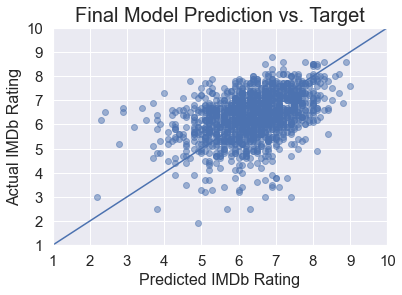

             Feature  Importance
2            runtime    0.249724
3             Profit    0.170130
0             budget    0.103972
1              gross    0.084302
185  genre_Animation    0.024296
168         rating_R    0.017724
186  genre_Biography    0.014652
183     genre_Action    0.014211
167     rating_PG-13    0.010353
187     genre_Comedy    0.009968


In [105]:
dt = get_model_metrics(x_train, y_train, x_test, y_test, tree.DecisionTreeRegressor(), 
                       parametric=False)

---
<a id='explore'></a>
## Part 4: _<u>Exploratory component</u>_

---
<a id='conc'></a>
## Part 5: _<u>Conclusion</u>_

# Appendix

## Preprocess function

In [16]:
def preprocess(path):
    df = pd.read_csv(path)

    ## create unique identifier of each movie 
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    ## create profit column
    df['Profit'] = df['gross'] - df['budget']

    #########################################################################################
    ## create new compact datarfame
    ## extract list of unique movie titles 
    #titles=list(set(df['title']))
    title_year_set = list(set(df['title_year']))

    # Create a dataframe where each row is a unique movie 
    movies={}
    for t in title_year_set:
        # Create a temperary datframe for subset of with title_year = t
        df_temp = df[df.title_year == t]

        # Extracting all the unique values for the attributes for the given title_year t
        star = np.unique(df_temp['star'])
        writer = np.unique(df_temp['writer'])
        director = np.unique(df_temp['director'])
        title = np.unique(df_temp['title'])
        rating = np.unique(df_temp['rating'])
        genre =np.unique(df_temp['genre'])
        released = np.unique(df_temp['released'])
        year = np.unique(df_temp['year'])
        month = np.unique(df_temp['month'])
        day = np.unique(df_temp['day'])
        score = np.unique(df_temp['score'])
        country = np.unique(df_temp['country'])
        budget = np.unique(df_temp['budget'])
        gross = np.unique(df_temp['gross'])
        company = np.unique(df_temp['company'])
        runtime = np.unique(df_temp['runtime'])
        region = np.unique(df_temp['region'])
        titleId = np.unique(df_temp['titleId'])
        primaryName = np.unique(df_temp['primaryName'])

        # Extract attributes which are based on primaryName and then as dictionaries
        cat = {}
        ncon = {}
        prim = {}
        known = {}
        for index, row in df[df.title_year == t].iterrows():
            pN = row['primaryName']
            cat[pN] = row['category']
            ncon[pN] = row['nconst']
            known[pN] = row['knownForTitles']

        movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
        'month':month, 'day':day, 'score':score, 'director':director, 'writer':writer, 'star':star, 'country':country,
        'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName, 'category':cat, 'nconst':ncon, 'knownForTitles':known}
        movies[t]=movie
    
    # Construct dataframe 
    d=pd.DataFrame(movies)
    df2=d.transpose()

    df_movies = df2.copy()
    # Finding one value for budget for each title_year
    df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else [np.nanmean(x)])

    # Unpack array
    col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
        'day', 'score', 'director', 'writer', 'star', 'country', 'budget',
        'gross', 'company', 'runtime']
        
    for col in col_unpack:
        df_movies[col] = [i[0] for i in df_movies[col]]

    #############################################################################
    ## Data cleaning

    # Drop missing values in budget
    df_movies = df_movies.dropna(subset=['budget'])
    # Dealing with missing values in rating
    df_movies['rating'].fillna("Not Rated", inplace = True) 
    df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
    df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
    'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

    df_movies = df_movies.dropna(subset=['month'])

    df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
    df_movies = df_movies.sort_values(by= ['released'])

    # Chagne type of month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

    # Convert the gross and budget from $ to Million $ 
    df_movies['gross'] = df_movies['gross']/1000000
    df_movies['budget'] = df_movies['budget']/1000000

    df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

    ####################################################################################
    ## add new features to df_movies

    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']

    ## we will create new column called released_2 that only consists of year and month information of movie release
    df_movies['released_2'] = str(df_movies['year']) + '_' + str(df_movies['month'])

    df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
    df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
    df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

    df_movies['continent'] = df_movies['country'].apply(country_to_continent)

    # Create duration column
    df_movies['duration'] = df_movies['runtime'].apply(duration)

    return df,df_movies


In [72]:
from collections import Counter

# Define function for binarization of columns with the top N most commen ones
def binary_features(train, features, N):
    for feature in features:
# Extract information and convert to list 
        if feature == 'primaryName':
            train[feature]= train[feature].apply(lambda x:[g for g in x])
        else:   
            train[feature]= train[feature].apply(lambda x:[x or []])

        # Finding top 30 most commen
        c = Counter(sum(train[feature], []))
        N_new = len(c)
        most_N = [x[0] for x in c.most_common(N)]

        # Removing the ones that are not in the top 30
        train['temp_N'] = train[feature].apply(lambda x: list(set(most_N) & set(x)))

        # Creat dummies
        dummies = pd.get_dummies(train['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
  
        # Join back with the original dataframe
        train = train.join(dummies)
        train.iloc[:,-N_new:] = train.iloc[:,-N_new:].fillna(0)

        # Drop the temperary colum
        train.drop(columns=['temp_N'], inplace=True)

        train.drop(columns=[feature], inplace=True)
    return train

In [50]:
train = pd.read_csv('df_movies.csv')

In [51]:
feature = 'genre'
train[feature]= train[feature].apply(lambda x:[x or []])
c = Counter(sum(train[feature], []))
most_N = [x[0] for x in c.most_common(30)]

In [52]:
train['temp_N'] = train[feature].apply(lambda x: list(set(most_N) & set(x)))


In [53]:
dummies = pd.get_dummies(train['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()

In [54]:
N = 30
train = train.join(dummies)
train.iloc[:,-N:] = train.iloc[:,-N:].fillna(0)

In [55]:
train.drop(columns=['temp_N'], inplace=True)

train.drop(columns=[feature], inplace=True)

In [56]:
train

,Unnamed: 0,title_year,titleId,title,rating,region,released,year,month,day,...,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
0,0,American Gigolo_1980,['tt0080365' 'tt4257262'],American Gigolo,R,US,1980-02-01,1980,February,1.0,...,1,0,0,0,0,0,0,0,0,0
1,1,The Fog_1980,['tt0014051' 'tt0058270' 'tt0080749' 'tt043229...,The Fog,R,US,1980-02-08,1980,February,8.0,...,0,0,0,0,1,0,0,0,0,0
2,2,Cruising_1980,['tt0080569' 'tt3696404' 'tt4828890'],Cruising,R,US,1980-02-15,1980,February,15.0,...,1,0,0,0,0,0,0,0,0,0
3,3,When Time Ran Out..._1980,['tt0081747'],When Time Ran Out...,PG,US,1980-03-28,1980,March,28.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Heaven's Gate_1980,['tt0080855' 'tt11210146' 'tt12892296' 'tt1480...,Heaven's Gate,R,US,1980-04-24,1980,April,24.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,5299,Penelope_2006,['tt0060818' 'tt0472160' 'tt1119944' 'tt116462...,Penelope,PG,US,NaN,2006,February,29.0,...,0,0,0,0,0,0,0,0,0,0
5300,5300,Killing Zoe_1994,['tt0110265'],Killing Zoe,R,US,NaN,1994,September,NaN,...,1,0,0,0,0,0,0,0,0,0
5301,5301,Cronos_1994,['tt0104029' 'tt14811148' 'tt5692086' 'tt60567...,Cronos,R,US,NaN,1994,May,NaN,...,0,0,0,1,0,0,0,0,0,0
5302,5302,Stormy Monday_1988,['tt0096180'],Stormy Monday,R,US,NaN,1988,May,NaN,...,1,0,0,0,0,0,0,0,0,0


## Helper functions

In [3]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    